In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install mxnet

     |████████████████████████████████| 46.9 MB 2.3 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
#import mxnet as mx
import math

In [ ]:
def parser(x):
    return datetime.strptime(x,'%m/%d/%Y')

In [ ]:
path = "/content/drive/MyDrive/Colab-Notebooks/Stock-Analysis/Data/"
# data = pd.read_csv(path+"NFLX.csv" , header=0 , parse_dates=["Date"] , date_parser= lambda d : datetime.strptime(d,'%m/%d/%y'))
data = pd.read_csv(path+"NFLX.csv" , header=0 )

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-27,7.142857,7.311429,6.992857,7.281429,7.281429,23347100
1,2010-01-28,8.812857,9.121429,8.675714,9.005714,9.005714,77352800
2,2010-01-29,8.962857,9.224286,8.792857,8.892857,8.892857,24604300
3,2010-02-01,8.830000,8.981429,8.532857,8.718571,8.718571,18914000
4,2010-02-02,8.707143,8.878571,8.695714,8.835714,8.835714,10242400


In [ ]:
def get_indicator(data) :
  data["MA_5"] = data["Close"].rolling(window = 5).mean()
  data["MA_10"] = data["Close"].rolling(window = 10).mean()
  data["EMA_26"] = data["Close"].ewm(span =26).mean()
  data["EMA_12"] = data["Close"].ewm(span=12).mean()
  data["MACD"] = (data["EMA_12"] - data["EMA_26"])
  data['ema'] = data['Close'].ewm(com=0.5).mean()
  data["SD"] = data["Close"].rolling(window = 20).std()
  data["Upper_band"] = (data["Close"].rolling(window = 20).mean()) + (data["SD"]*2)
  data["Lower_band"] = (data["Close"].rolling(window = 20).mean()) - (data["SD"]*2)
  data["Momentum"] = (data["Close"]/100)-1
  return data

In [ ]:
data = get_indicator(data)

In [ ]:
def visualize_indicator(data, days) :
  plt.figure(figsize=(16,10) , dpi =100)
  shape_i = data.shape[0]
  xmacd_ = shape_i -days
  data = data.iloc[-days:,:]
  x_ = list(data.index)

  plt.subplot(2,1,1)
  plt.plot(data["MA_5"] , label = "MA 5" , color ="g" , linestyle = "--")
  plt.plot(data["Close"] , label = "Closing Price" , color ="b")
  plt.plot(data["MA_10"] , label = "MA 10" , color ="r" , linestyle = "--")
  plt.plot(data["Upper_band"] , label = "Upper Band" , color ="c")
  plt.plot(data["Lower_band"] , label = "Lower Band" , color ="c")
  plt.fill_between(x_, data['Lower_band'], data['Upper_band'], alpha=0.35)
  plt.title("Techical Analysis for {} days".format(days))
  plt.ylabel("USD")
  plt.legend() 

  plt.subplot(2, 1, 2)
  plt.title('MACD')
  plt.plot(data['MACD'],label='MACD', linestyle='-.')
  plt.hlines(15, xmacd_, shape_i, colors='g', linestyles='--')
  plt.hlines(-15, xmacd_, shape_i, colors='g', linestyles='--')
  plt.plot(data['Momentum'],label='Momentum', color='b',linestyle='-')

  plt.legend()
  plt.show()


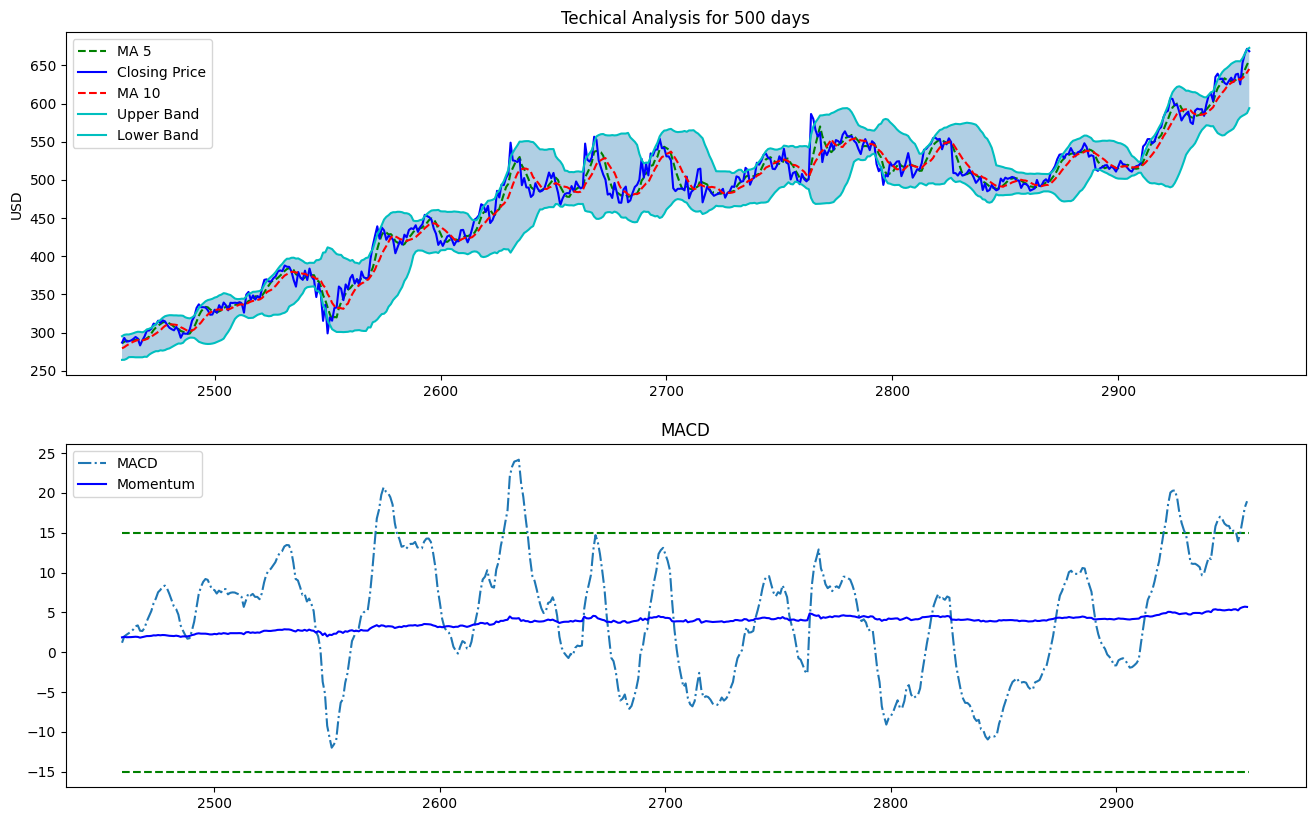

In [ ]:
visualize_indicator(data, 500)

In [ ]:
data_four_transform = data[["Date" , "Close"]]
close_fft = np.fft.fft(np.asarray(data_four_transform["Close"].tolist()))
data_four_transformed = pd.DataFrame({"fft" : close_fft})
data_four_transformed['absolute'] = data_four_transformed["fft"].apply(lambda x:np.abs(x))
data_four_transformed['angle'] = data_four_transformed["fft"].apply(lambda x : np.angle(x))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


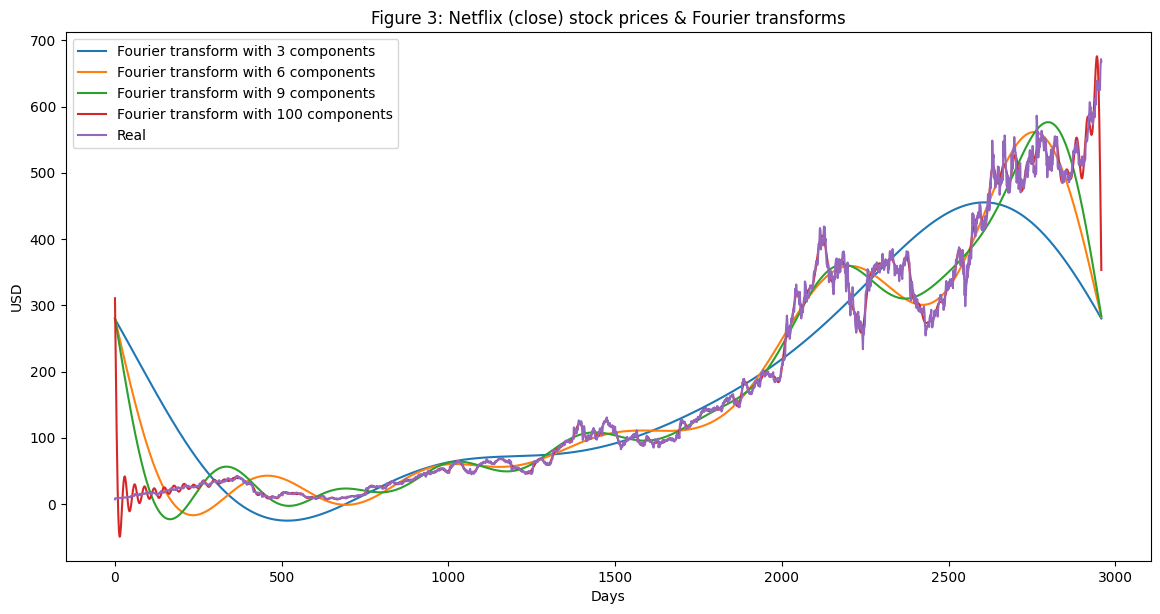

In [ ]:
plt.figure(figsize=(14, 7), dpi=100)
data_four_transformed_list = np.asarray(data_four_transformed['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(data_four_transformed_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_four_transform['Close'],  label='Real')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 3: Netflix (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

In [ ]:
def get_fourier(data):
  data_four_transform = data[["Date", "Close"]]
  close_four_transform = np.fft.fft(np.asarray(data_four_transform["Close"].tolist()))
  close_four_transform = np.fft.ifft(close_fft)
  four_data = pd.DataFrame({'fft':close_fft})
  four_data['absolute'] = four_data['fft'].apply(lambda x : np.abs(x))
  four_data['angle'] = four_data['fft'].apply(lambda x : np.angle(x))
  four_data_list = np.asarray(four_data['fft'].tolist())
  four_list_m10 = np.copy(four_data_list); four_list_m10[100:-100]=0
  data["Fourier"] = pd.DataFrame(four_list_m10).apply(lambda x:np.abs(x))
  return data

In [ ]:
data = get_fourier(data)
data

,Date,Open,High,Low,Close,Adj Close,Volume,MA_5,MA_10,EMA_26,EMA_12,MACD,ema,SD,Upper_band,Lower_band,Momentum,Fourier
0,2010-01-27,7.142857,7.311429,6.992857,7.281429,7.281429,23347100,NaN,NaN,7.281429,7.281429,0.000000,7.281429,NaN,NaN,NaN,-0.927186,515072.919498
1,2010-01-28,8.812857,9.121429,8.675714,9.005714,9.005714,77352800,NaN,NaN,8.176731,8.215417,0.038686,8.574643,NaN,NaN,NaN,-0.909943,286600.822601
2,2010-01-29,8.962857,9.224286,8.792857,8.892857,8.892857,24604300,NaN,NaN,8.434028,8.479822,0.045794,8.794945,NaN,NaN,NaN,-0.911071,131946.279944
3,2010-02-01,8.830000,8.981429,8.532857,8.718571,8.718571,18914000,NaN,NaN,8.513574,8.555186,0.041612,8.743393,NaN,NaN,NaN,-0.912814,69752.581228
4,2010-02-02,8.707143,8.878571,8.695714,8.835714,8.835714,10242400,8.546857,NaN,8.588279,8.631404,0.043125,8.805195,NaN,NaN,NaN,-0.911643,89704.226437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,2021-10-20,625.570007,637.400024,617.150024,625.140015,625.140015,10622000,632.839990,631.044989,613.081883,627.001728,13.919845,629.333651,18.316163,655.252322,581.987668,5.251400,75414.876848
2955,2021-10-21,628.890015,654.010010,628.650024,653.159973,653.159973,8437100,636.711987,633.175989,616.050630,631.026073,14.975443,645.217866,18.840935,659.296864,583.933123,5.531600,89704.226437
2956,2021-10-22,651.809998,665.460022,651.809998,664.780029,664.780029,6179700,644.009998,636.387994,619.660215,636.218990,16.558775,658.259308,19.857043,664.948581,585.520408,5.647800,69752.581228
2957,2021-10-25,663.739990,675.880005,657.070007,671.659973,671.659973,3833500,650.747998,640.849994,623.512049,641.671449,18.159400,667.193085,20.866062,670.917616,587.453368,5.716600,131946.279944


In [ ]:

!pip install numpy scipy patsy pandas
!pip install pmdarima
!pip install statsmodels

     |████████████████████████████████| 1.4 MB 3.5 MB/s 
     |████████████████████████████████| 9.8 MB 33.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
#Check if the series is stationary
# p >0.05
adf_test(data["Close"])

Results of Dickey-Fuller Test:
Test Statistic                    1.970619
p-value                           0.998634
#Lags Used                       28.000000
Number of Observations Used    2930.000000
Critical Value (1%)              -3.432584
Critical Value (5%)              -2.862527
Critical Value (10%)             -2.567295
dtype: float64


In [ ]:
import statsmodels as stm
from statsmodels.tsa.arima.model import ARIMA
sequence = data["Close"]
model = ARIMA(sequence, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2959
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -9471.788
Date:                Thu, 09 Dec 2021   AIC                          18955.576
Time:                        08:45:22   BIC                          18991.529
Sample:                             0   HQIC                         18968.517
                               - 2959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0848      0.011     -7.678      0.000      -0.106      -0.063
ar.L2          0.0096      0.010      0.962      0.336      -0.010       0.029
ar.L3         -0.0054      0.011     -0.503      0.6

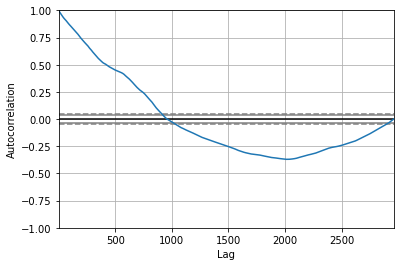

<Figure size 800x560 with 0 Axes>

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sequence)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

In [ ]:
X = sequence.values
size = int(len(X) * 0.66)
data_train, data_test = X[0:size], X[size:len(X)]
history = [x for x in data_train]
predictions = list()
for t in range(len(data_test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = data_test[t]
    history.append(obs)

data['ARIMA'] = pd.DataFrame(predictions)

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(data_test, predictions)
print('Test MSE: %.3f' % error)


Test MSE: 98.227


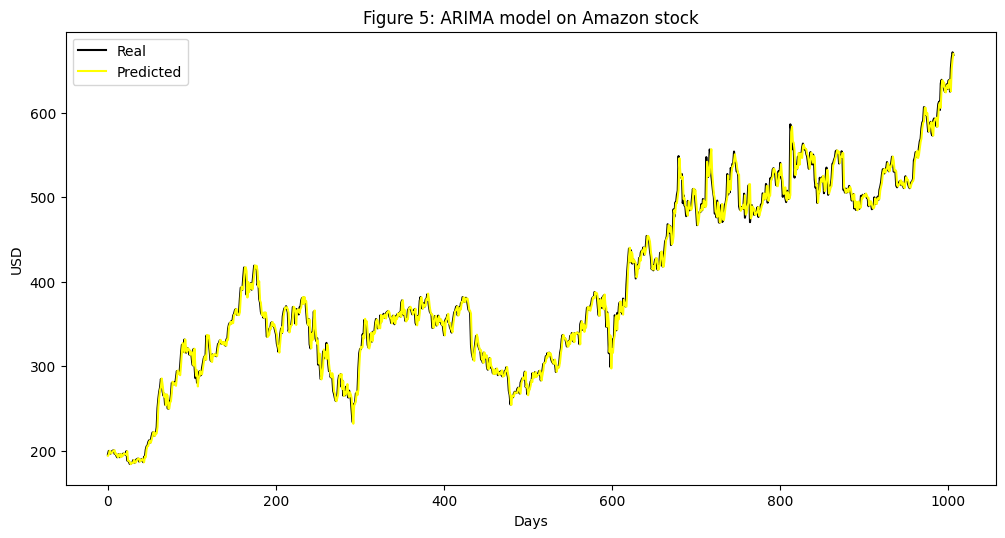

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(data_test, color='black', label='Real')
plt.plot(predictions, color='yellow', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 5: ARIMA model on Amazon stock')
plt.legend()
plt.show()

In [ ]:
print('Total dataset has {} samples, and {} features.'.format(data.shape[0], \
                                                              data.shape[1]))

Total dataset has 2959 samples, and 19 features.


In [ ]:
print(data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA_5',
       'MA_10', 'EMA_26', 'EMA_12', 'MACD', 'ema', 'SD', 'Upper_band',
       'Lower_band', 'Momentum', 'Fourier', 'ARIMA'],
      dtype='object')


In [ ]:
def get_feature_importance_data(data_income):
    df= data_income.copy()
    y = df['Close']
    X = df.iloc[:,1:19]
    
    train_samples = int(X.shape[0] * 0.65)
 
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]
    
    return (X_train, y_train), (X_test, y_test)

In [ ]:
(xtrain_feature_imp, ytrain_feature_imp), (xtest_feature_imp, ytest_feature_imp) = get_feature_importance_data(data)

In [ ]:
import xgboost as boost
regressor = boost.XGBRegressor(gamma=0.0,n_estimators=200,base_score=0.7,colsample_bytree=1,learning_rate=0.05)


In [ ]:
xgbModel = regressor.fit(xtrain_feature_imp,ytrain_feature_imp, \
                         eval_set = [(xtrain_feature_imp, ytrain_feature_imp), (xtest_feature_imp, ytest_feature_imp)], \
                         verbose=False)

[19:58:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
eval_result = regressor.evals_result()

In [ ]:
training_rounds = range(len(eval_result['validation_0']['rmse']))


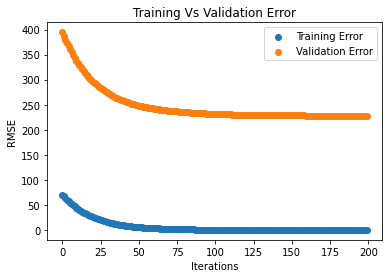

In [ ]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

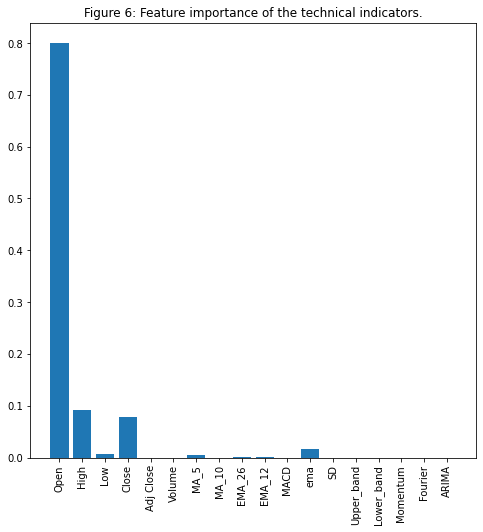

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=xtest_feature_imp.columns)
plt.title('Figure 6: Feature importance of the technical indicators.')
plt.show()

In [ ]:
data = data.drop(columns='Date')
data.head(7)

,Open,High,Low,Close,Adj Close,Volume,MA_5,MA_10,EMA_26,EMA_12,MACD,ema,SD,Upper_band,Lower_band,Momentum,Fourier,ARIMA
0,7.142857,7.311429,6.992857,7.281429,7.281429,23347100,NaN,NaN,7.281429,7.281429,0.000000,7.281429,NaN,NaN,NaN,-0.927186,515072.919498,193.753381
1,8.812857,9.121429,8.675714,9.005714,9.005714,77352800,NaN,NaN,8.176731,8.215417,0.038686,8.574643,NaN,NaN,NaN,-0.909943,286600.822601,195.320050
2,8.962857,9.224286,8.792857,8.892857,8.892857,24604300,NaN,NaN,8.434028,8.479822,0.045794,8.794945,NaN,NaN,NaN,-0.911071,131946.279944,199.726764
3,8.830000,8.981429,8.532857,8.718571,8.718571,18914000,NaN,NaN,8.513574,8.555186,0.041612,8.743393,NaN,NaN,NaN,-0.912814,69752.581228,198.221852
4,8.707143,8.878571,8.695714,8.835714,8.835714,10242400,8.546857,NaN,8.588279,8.631404,0.043125,8.805195,NaN,NaN,NaN,-0.911643,89704.226437,196.498189
5,8.835714,8.982857,8.761429,8.850000,8.850000,8761200,8.860571,NaN,8.640700,8.684534,0.043834,8.835106,NaN,NaN,NaN,-0.911500,75414.876848,197.899735
6,8.764286,8.892857,8.590000,8.620000,8.620000,11026400,8.783428,NaN,8.637019,8.670134,0.033115,8.691636,NaN,NaN,NaN,-0.913800,39968.578042,199.134691


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler

data_train, data_val, data_test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])
data_open = data_train.iloc[:, 1:2].values
scaler = MinMaxScaler(feature_range = (0, 1))
data_open = scaler.fit_transform(data_open)

feat_1 = []
tag_1 = []
for i in range(60,450): 
    feat_1.append(data_open[i-60:i, 0])
    tag_1.append(data_open[i, 0])


In [ ]:
feat_1, tag_1 = np.array(feat_1), np.array(tag_1)
feat_1 = np.reshape(feat_1, (feat_1.shape[0], feat_1.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(feat_1.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
model.fit(feat_1, tag_1, epochs = 100, batch_size = 32,validation_data = (feat_1, tag_1))


Epoch 1/100
13/13 [==============================] - 6s 159ms/step - loss: 0.0849 - mean_absolute_error: 0.2341 - val_loss: 0.0722 - val_mean_absolute_error: 0.2178
Epoch 2/100
13/13 [==============================] - 1s 82ms/step - loss: 0.0712 - mean_absolute_error: 0.2323 - val_loss: 0.0724 - val_mean_absolute_error: 0.2155
Epoch 3/100
13/13 [==============================] - 1s 82ms/step - loss: 0.0717 - mean_absolute_error: 0.2185 - val_loss: 0.0749 - val_mean_absolute_error: 0.2507
Epoch 4/100
13/13 [==============================] - 1s 82ms/step - loss: 0.0745 - mean_absolute_error: 0.2396 - val_loss: 0.0704 - val_mean_absolute_error: 0.2202
Epoch 5/100
13/13 [==============================] - 1s 85ms/step - loss: 0.0712 - mean_absolute_error: 0.2329 - val_loss: 0.0704 - val_mean_absolute_error: 0.2187
Epoch 6/100
13/13 [==============================] - 1s 86ms/step - loss: 0.0717 - mean_absolute_error: 0.2177 - val_loss: 0.0699 - val_mean_absolute_error: 0.2340
Epoch 7/100
13/

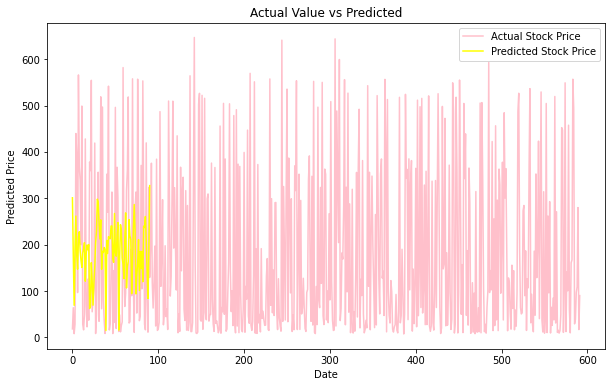

In [ ]:
open_testing_processed = data_test.iloc[:, 1:2].values
open_data = pd.concat((data_train['Open'], data_test['Open']), axis=0)
input_test = open_total[len(open_data) - len(open_data) - 60:].values
input_test = input_test.reshape(-1,1)
input_test = scaler.transform(input_test)
test_features = []
for i in range(60, 151):
    test_features.append(input_test[i-60:i, 0])
test_features = np.array(test_features)
test_features.shape
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
predictions = model.predict(test_features)
predictions = scaler.inverse_transform(predictions)
plt.figure(figsize=(10,6))
plt.plot(open_testing_processed, color='pink', label='Actual Stock Price')
plt.plot(predictions , color='yellow', label='Predicted Stock Price')
plt.title('Actual Value vs Predicted')
plt.xlabel('Date')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()